In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [44]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

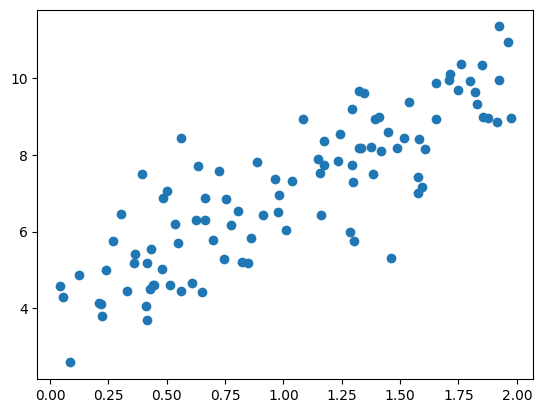

In [45]:
import matplotlib.pyplot as plt 

plt.scatter(x, y)
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x, y)

LinearRegression()

In [47]:
linear_reg.coef_

array([[3.00838762]])

In [48]:
linear_reg.intercept_

array([4.00411034])

**The LinearRegression class uses Singular Value Decomposition(SVD) closed form to find the values.**

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

param_grid = [
    {"max_iter": [100, 1000, 5000, 10000], "eta0": [0.01, 0.1, 0.15, 0.2],"tol" : [0.0001, 0.001, 0.01,0.1]}
]

sgd_model = SGDRegressor()
grid_search = GridSearchCV(sgd_model, param_grid, cv = 5, scoring = "neg_mean_squared_error")
grid_search.fit(x, y.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stocha

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'eta0': [0.01, 0.1, 0.15, 0.2],
                          'max_iter': [100, 1000, 5000, 10000],
                          'tol': [0.0001, 0.001, 0.01, 0.1]}],
             scoring='neg_mean_squared_error')

In [50]:
grid_search.best_params_

{'eta0': 0.2, 'max_iter': 10000, 'tol': 0.01}

In [51]:
sgd_model = SGDRegressor(max_iter=100, eta0=0.15, tol=0.1, penalty = None)
sgd_model.fit(x, y.ravel())

SGDRegressor(eta0=0.15, max_iter=100, penalty=None, tol=0.1)

In [52]:
sgd_model.coef_

array([3.0545028])

In [53]:
sgd_model.intercept_

array([3.97132059])

# Polynomial Regression

In [54]:
m = 100
x = 6 * np.random.randn(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x)

In [56]:
x[0]

array([-4.96154188])

In [57]:
x_poly[0]

array([-4.96154188, 24.61689779])

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

In [59]:
lin_reg.intercept_

array([1.82979241])

In [60]:
lin_reg.coef_

array([[1.0014615, 0.5048096]])

In [61]:
print(y)

[[12.0282083 ]
 [ 8.36315887]
 [24.39892686]
 [ 0.54918024]
 [ 3.81141449]
 [36.36463907]
 [ 4.14545751]
 [47.57071182]
 [ 9.31377034]
 [29.56108077]
 [24.16736412]
 [36.13996274]
 [82.10756738]
 [ 1.18775643]
 [ 4.72561387]
 [ 6.95389553]
 [11.2357083 ]
 [ 2.61937128]
 [ 8.20876955]
 [ 5.99762786]
 [12.55014649]
 [ 4.58985246]
 [ 4.9562798 ]
 [ 1.71424538]
 [29.10274672]
 [ 3.88551067]
 [31.4513054 ]
 [33.76126462]
 [ 9.62236703]
 [26.23426033]
 [ 1.74313807]
 [ 4.35993961]
 [ 5.58529108]
 [38.34875697]
 [ 4.03207009]
 [43.63596535]
 [ 1.94508815]
 [17.53565426]
 [ 9.44415301]
 [ 3.66644943]
 [ 6.91707349]
 [ 2.3159006 ]
 [ 1.74898514]
 [15.03085949]
 [85.11312662]
 [84.68058768]
 [ 5.9032851 ]
 [ 6.0808613 ]
 [ 2.41052931]
 [19.23334716]
 [ 7.2882857 ]
 [ 1.71737708]
 [ 4.60992289]
 [ 2.44323673]
 [11.65418733]
 [44.01459188]
 [31.20443094]
 [ 7.2324663 ]
 [ 7.44664303]
 [32.4214331 ]
 [ 1.2966485 ]
 [ 5.47498308]
 [-0.65466841]
 [ 1.98637598]
 [ 8.52322008]
 [12.98513357]
 [ 2.13918

In [62]:
prediction = lin_reg.predict(x_poly)
print(prediction)

[[ 9.28784554]
 [ 7.68999306]
 [25.35065753]
 [ 1.68854183]
 [ 4.87080118]
 [35.81435182]
 [ 3.60035778]
 [47.56746481]
 [ 9.62969142]
 [30.5805168 ]
 [23.05888267]
 [36.33195533]
 [83.07940282]
 [ 2.44144194]
 [ 5.0935774 ]
 [ 7.79451626]
 [13.02139843]
 [ 1.67469154]
 [ 7.15809413]
 [ 8.12699334]
 [13.23397043]
 [ 5.38536731]
 [ 2.61134676]
 [ 1.47641781]
 [29.1190274 ]
 [ 3.64959318]
 [30.94747871]
 [34.21681201]
 [ 8.94222512]
 [27.66607908]
 [ 2.4408445 ]
 [ 4.30056602]
 [ 5.63868891]
 [38.75656432]
 [ 3.27054404]
 [42.45648708]
 [ 1.69960203]
 [17.45388969]
 [ 9.20463492]
 [ 3.58182613]
 [ 8.61843867]
 [ 2.72985503]
 [ 1.60376312]
 [15.79141563]
 [84.40046331]
 [85.58180862]
 [ 6.95227931]
 [ 4.8466206 ]
 [ 2.40119773]
 [17.08679609]
 [ 5.44390692]
 [ 1.33580562]
 [ 2.83442207]
 [ 2.54441599]
 [12.88900385]
 [44.73738926]
 [31.53988784]
 [ 8.2047615 ]
 [ 6.43719163]
 [32.01511625]
 [ 3.04722092]
 [ 3.95811501]
 [ 1.60322216]
 [ 2.78307365]
 [ 6.927242  ]
 [11.70246554]
 [ 3.32225

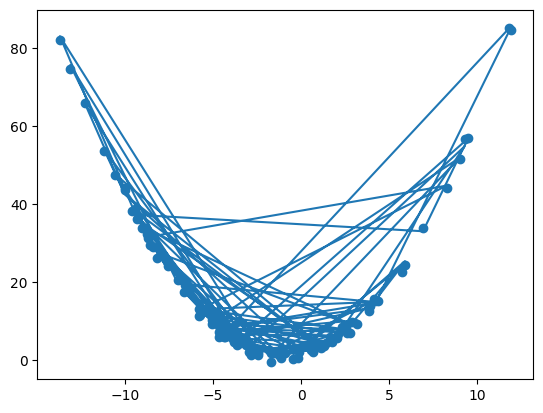

In [63]:
fig, ax = plt.subplots()
ax.plot(x, prediction, "-")
ax.scatter(x, y)

**Learning curves**

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2,)
    train_errors, val_errors = [], []
    
    for m in range(1,len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
    plt.plot(np.sqrt(train_errors), linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), linewidth = 3, label = "val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

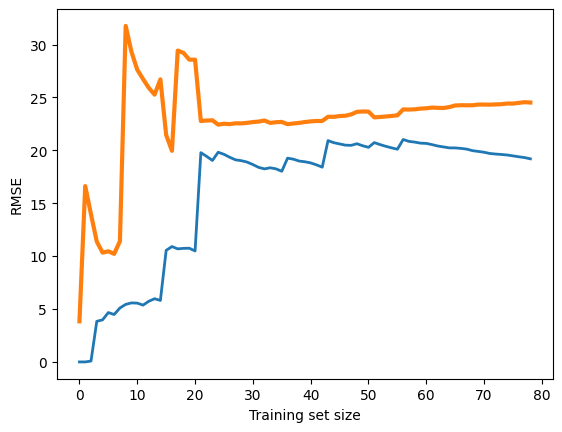

In [65]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,x,y)

In [66]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree =1, include_bias = False)),
    ("lin_reg", LinearRegression())
])


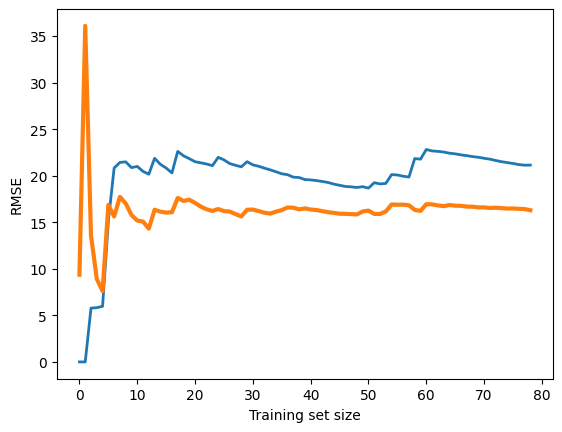

In [67]:
plot_learning_curve(pipeline, x, y)

# Regularizing the linear models.

**Ridge regression**

Using closed form solution of linear models, for regularizing.

In [68]:
from sklearn.linear_model import Ridge 

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[15.93007071]])

In [69]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([15.21691001])

In [70]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([15.94153753])

In [71]:
sgd_reg1 = SGDRegressor(penalty = "l1")
sgd_reg1.fit(x,y.ravel())
sgd_reg1.predict([[1.5]])

array([12.55214405])

# Logistic Regression

In [72]:
from sklearn import datasets

iris = datasets.load_iris()

In [73]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [74]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [75]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [77]:
print(iris.data[3])
print(iris.target[3])

[4.6 3.1 1.5 0.2]
0


Trying to build a classifier to detect Iris Virginca based on the petal width feature only. 

In [78]:
X = iris["data"][:,3:]
Y = (iris["target"] == 2)

In [79]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, Y)

LogisticRegression()

In [80]:
X_new =np.linspace(0, 3, 1000)
print(X_new.shape)
X_new = X_new.reshape(-1, 1)
print(X_new.shape)
X_new[1]

(1000,)
(1000, 1)


array([0.003003])

In [81]:
y_proba = log_reg.predict_proba(X_new)

In [82]:
virginica = []
not_virginica = []
for x in X[iris["target"] == 2]:
    if x < 3.0:
        virginica.append(x)

for x in X[iris["target"] != 2]:
    if x < 3.0:
        not_virginica.append(x)

In [83]:
virginica

[array([2.5]),
 array([1.9]),
 array([2.1]),
 array([1.8]),
 array([2.2]),
 array([2.1]),
 array([1.7]),
 array([1.8]),
 array([1.8]),
 array([2.5]),
 array([2.]),
 array([1.9]),
 array([2.1]),
 array([2.]),
 array([2.4]),
 array([2.3]),
 array([1.8]),
 array([2.2]),
 array([2.3]),
 array([1.5]),
 array([2.3]),
 array([2.]),
 array([2.]),
 array([1.8]),
 array([2.1]),
 array([1.8]),
 array([1.8]),
 array([1.8]),
 array([2.1]),
 array([1.6]),
 array([1.9]),
 array([2.]),
 array([2.2]),
 array([1.5]),
 array([1.4]),
 array([2.3]),
 array([2.4]),
 array([1.8]),
 array([1.8]),
 array([2.1]),
 array([2.4]),
 array([2.3]),
 array([1.9]),
 array([2.3]),
 array([2.5]),
 array([2.3]),
 array([1.9]),
 array([2.]),
 array([2.3]),
 array([1.8])]

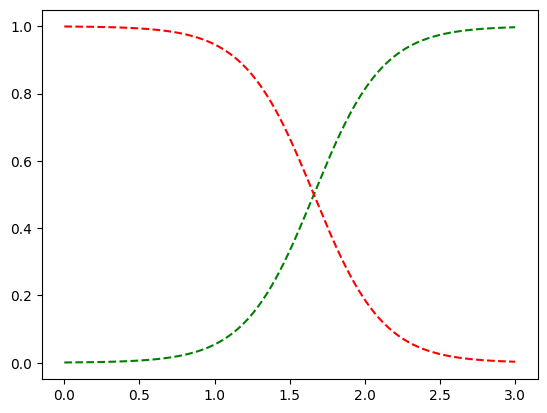

In [84]:
plt.plot(X_new, y_proba[:, 1],"g--", label = "Virginica")
plt.plot(X_new, y_proba[:, 0],"r--", label = "Not Virginica")